### CONDA ENVIRONMENTS

For steps __1. preprocess__ and __2. mip__, `conda activate g5ht-pipeline`

For step __3. segment__, `conda activate segment-torch` or `conda activate torchcu129`

For step __4. spline, 5. orient, 6. warp, 7. reg__

In [2]:
import sys
import os
import importlib

import utils

# SPECIFY DATA TO PROCESS

In [3]:

DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251114'
INPUT_ND2 = 'date-20251114_strain-ISg5HT_condition-fedpatch_worm009.nd2'
INPUT_ND2_PTH = os.path.join(DATA_PTH, INPUT_ND2)

NOISE_PTH = r'C:\Users\munib\POSTDOC\CODE\g5ht-pipeline\noise\noise_111125.tif'

OUT_DIR = os.path.splitext(INPUT_ND2_PTH)[0]

STACK_LENGTH = 1

noise_stack = utils.get_noise_stack(NOISE_PTH, STACK_LENGTH)

num_frames, height, width, num_channels = utils.get_range_from_nd2(INPUT_ND2_PTH, stack_length=STACK_LENGTH) 


print(INPUT_ND2)
print('Num z-slices: ', STACK_LENGTH)
print('Number of frames: ', num_frames)
print('Height: ', height)
print('width: ', width)
print('Number of channels: ', num_channels)

date-20251114_strain-ISg5HT_condition-fedpatch_worm009.nd2
Num z-slices:  1
Number of frames:  38000
Height:  512
width:  512
Number of channels:  2


# 1. PREPROCESS

### PARALLEL

if processing locally, would recommend setting the 6th arg (number of workers) to something less than 10 if you want to use your computer at the same time

In [ ]:
from preprocess_parallel import main as preprocess_nd2_parallel
_ = importlib.reload(sys.modules['preprocess_parallel'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, "0", str(num_frames), NOISE_PTH, STACK_LENGTH, 5]

# Call the main function
preprocess_nd2_parallel()

### SERIAL

In [ ]:
from preprocess import main as preprocess_nd2
_ = importlib.reload(sys.modules['utils'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, "0", NOISE_PTH]

# Call the main function
preprocess_nd2()

### TESTING 1 zslice

##### PARALLEL

In [ ]:
from preprocess_parallel import main as preprocess_nd2_parallel
_ = importlib.reload(sys.modules['preprocess_parallel'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, "0", str(num_frames-1), NOISE_PTH, STACK_LENGTH, 5, num_frames, height, width, num_channels]

# Call the main function
preprocess_nd2_parallel()

##### SERIAL

In [3]:
from preprocess import main as preprocess_nd2
from tqdm import tqdm

# command-line arguments
for i in tqdm(range(num_frames)):
    sys.argv = ["", INPUT_ND2_PTH, str(i), NOISE_PTH, STACK_LENGTH, num_frames, height, width, num_channels]

    # Call the main function
    preprocess_nd2()

100%|██████████| 38000/38000 [1:44:03<00:00,  6.09it/s]  


# 2. MAX INTENSITY PROJECTION

In [4]:
from mip import main as mip

_ = importlib.reload(sys.modules['mip'])
_ = importlib.reload(sys.modules['utils'])

# command-line arguments
sys.argv = ["", INPUT_ND2_PTH, STACK_LENGTH, num_frames, 75]

# Call the main function
mip()

# 3. SEGMENT

### on home pc
`conda activate segment-torch`

Uses a separate conda environment from the rest of the pipeline. create it using:
`conda env create -f segment_torch.yml`

### on lab pc
`conda activate torchcu129`

Uses a separate conda environment from the rest of the pipeline. create it following steps in:
`segment_torch_cu129_environment.yml`

### setup each time model weights change
Need to set path to model weights as `CHECKPOINT` in `eval_torch.py`

In [1]:

import sys
import os

DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251114'
INPUT_ND2 = 'date-20251114_strain-ISg5HT_condition-fedpatch_worm009.nd2'
INPUT_ND2_PTH = os.path.join(DATA_PTH, INPUT_ND2)
OUT_DIR = os.path.splitext(INPUT_ND2_PTH)[0]
MIP_PTH = os.path.join(OUT_DIR, 'mip.tif')

OUT_DIR = os.path.splitext(INPUT_ND2_PTH)[0]

STACK_LENGTH = 1

print(INPUT_ND2)


date-20251114_strain-ISg5HT_condition-fedpatch_worm009.nd2


In [2]:
from segment.segment_torch import main as segment_mip


# command-line arguments
sys.argv = ["", MIP_PTH]

segment_mip()


mip: 0
mip: 4
mip: 8
mip: 12
mip: 16
mip: 20
mip: 24
mip: 28
mip: 32
mip: 36
mip: 40
mip: 44
mip: 48
mip: 52
mip: 56
mip: 60
mip: 64
mip: 68
mip: 72
mip: 76
mip: 80
mip: 84
mip: 88
mip: 92
mip: 96
mip: 100
mip: 104
mip: 108
mip: 112
mip: 116
mip: 120
mip: 124
mip: 128
mip: 132
mip: 136
mip: 140
mip: 144
mip: 148
mip: 152
mip: 156
mip: 160
mip: 164
mip: 168
mip: 172
mip: 176
mip: 180
mip: 184
mip: 188
mip: 192
10{"stdout":"[{\"variableName\": \"ID_TO_MEANING\", \"type\": \"dictionary\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"builtins.dict\"}, {\"variableName\": \"NULL\", \"type\": \"unknown\", \"supportedEngines\": [\"pandas\"], \"isLocalVariable\": true, \"rawType\": \"_pydevd_bundle.pydevd_constants.Null\"}]\n","stderr":"","mime":[]}
mip: 196
mip: 200
mip: 204
mip: 208
mip: 212
mip: 216
mip: 220
mip: 224
mip: 228
mip: 232
mip: 236
mip: 240
mip: 244
mip: 248
mip: 252
mip: 256
mip: 260
mip: 264
mip: 268
mip: 272
mip: 276
mip: 280
mip: 284
mip: 288


# 4. SPLINE

`conda activate g5ht-pipeline`

In [ ]:
import sys
import os
from spline import main as get_spline

# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\label.tif'
PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002\label.tif'

# command-line arguments
sys.argv = ["", PTH]

get_spline()

# 5. ORIENT

`conda activate g5ht-pipeline`

In [ ]:
import sys
import os
from orient import main as find_orientation

# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\spline.json'
PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002\spline.json'

# command-line arguments
sys.argv = ["", PTH, 100, 400]

find_orientation()

# 6. WARP

`conda activate g5ht-pipeline`

TODO: parallelize

In [ ]:
import sys
import os
from warp import main as warp_worm
from tqdm import tqdm

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'
# PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\022025_eft_41z_starved_worm002\022025_eft_41z_starved_worm002'

for i in tqdm(range(1200)):
    # command-line arguments
    sys.argv = ["", PTH, i]

    warp_worm()

### TEST PARALLEL (TODO)

In [ ]:
from warp_parallel import main as warp_worm_parallel

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'

# command-line arguments
sys.argv = ["", PTH, "0", "1199"]

# Call the main function
warp_worm_parallel()

# 7. REG

`conda activate g5ht-pipeline`

TODO: parallelize

- changed `moving_mask` to be `fixed_mask.tif`. is that right?

In [2]:
import sys
import os
from tqdm import tqdm
import importlib

from reg import main as reg_worm

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'

# for i in tqdm(range(1200)):
#     # command-line arguments
#     sys.argv = ["", PTH, i]

#     reg_worm()

for i in tqdm(range(11,1200)):
    sys.argv = ["", PTH, i]
    reg_worm()

  7%|▋         | 81/1189 [2:25:23<33:08:45, 107.69s/it]


KeyboardInterrupt: 

### View fixed and move as one image (see reg_test.ipynb)

### Make a video from registered images

`conda activate imgpro`

In [29]:
import sys
import os
import glob
import tifffile
import numpy as np
from skimage.io import imread

import matplotlib.pyplot as plt
from tqdm import tqdm

from microfilm.microplot import microshow
from microfilm.microplot import Micropanel
from microfilm.microanim import Microanim
from microfilm.microplot import Microimage


# DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\registered'
DATA_PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\wholistic_registered_10'
reg_contents = glob.glob(os.path.join(DATA_PTH,'*.tif'))

mip = np.zeros((2,len(reg_contents),200,500))
for i in tqdm(range(len(reg_contents))):
    mip[:,i,:,:] = np.max(tifffile.imread(reg_contents[i]), axis=0) #CTHW
    # mip[:,i,:,:] = tifffile.imread(reg_contents[i])[18,:,:,:] #CTHW



100%|██████████| 156/156 [00:07<00:00, 20.48it/s]


In [18]:
im.shape

(39, 2, 200, 500)

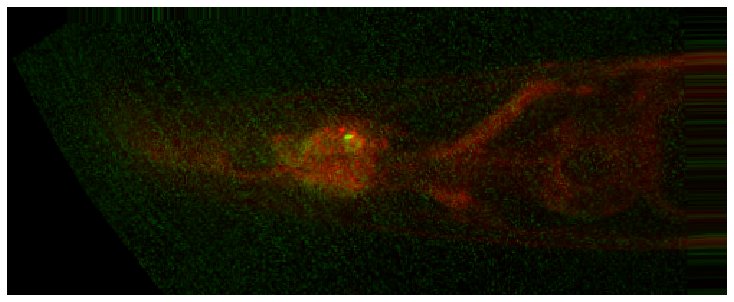

In [25]:
microshow(im[18,:,:,:],cmaps=['green','red'], flip_map=False, fig_scaling=10)

In [27]:
mip.shape

(2, 307, 200, 500)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1500, 600) to (1504, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


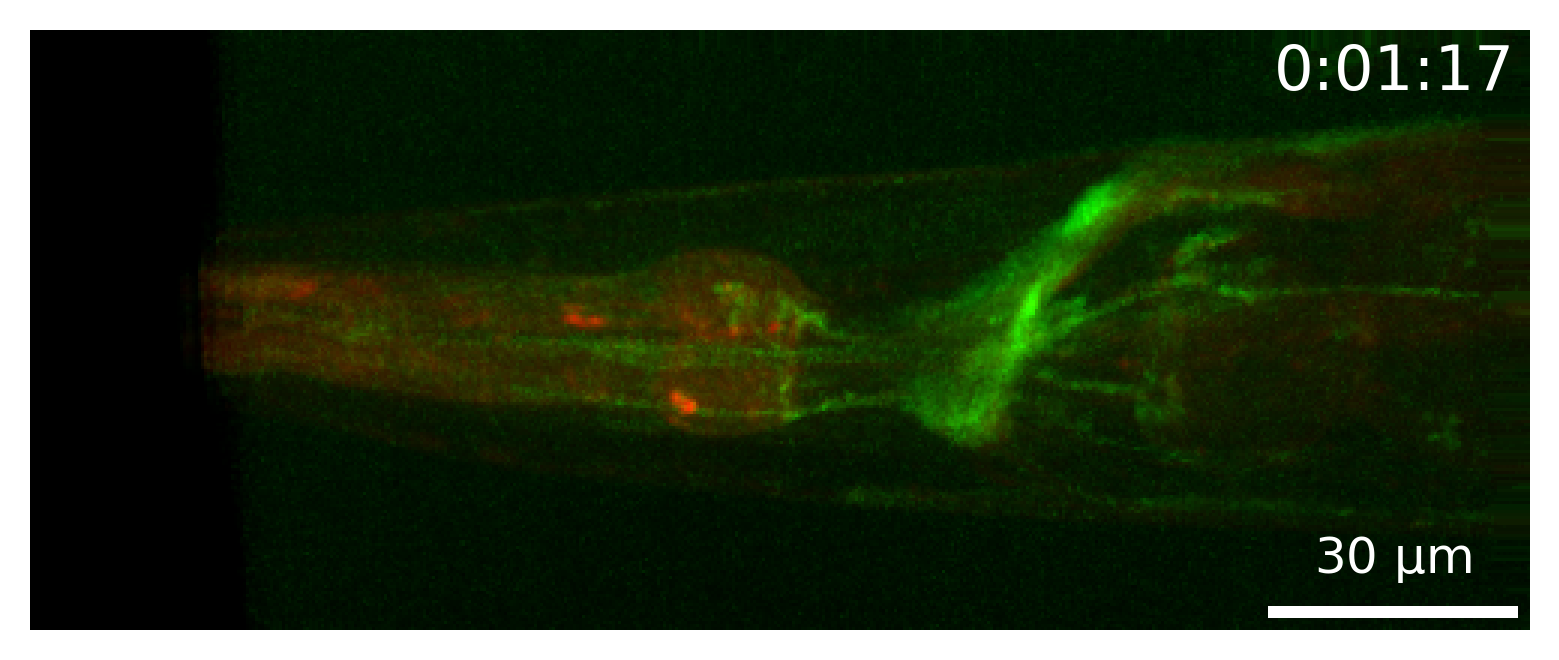

In [30]:
anim_output = r"C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\whoreg_mip.mp4"
# anim_output = r"C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001\whoreg_z18.mp4"
%matplotlib inline
anim = Microanim(
    mip, cmaps=['green','red'], flip_map=False, fig_scaling=5, dpi=300,
    unit='um', scalebar_unit_per_pix=0.36, scalebar_size_in_units=30,
    scalebar_thickness=0.02, scalebar_font_size=12, rescale_type='limits', limits=[[0,256],[50,2000]])
anim.add_time_stamp(unit='mmm', unit_per_frame=533, location='upper right')
anim.save_movie(anim_output, quality=10, fps=10)

# 8. QUANTIFY

`conda activate g5ht-pipeline`

Have to first label dorsal and ventral nerve rings and pharynx. See ...

In [ ]:
import sys
import os
from quantify import main as quantify_roi_intensity
from numpy import genfromtxt
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
matplotlib.rc('font', **font)

PTH = r'C:\Users\munib\POSTDOC\DATA\g5ht-free\20251028\date-20251028_time-1500_strain-ISg5HT_condition-starvedpatch_worm001'


sys.argv = ["", PTH]
quantify_roi_intensity()

In [ ]:
roi_intensity = genfromtxt(os.path.join(PTH,'quantified.csv'), delimiter=',')
roi_intensity = roi_intensity[1:,:]
roi_intensity

In [ ]:
%matplotlib qt

t = roi_intensity[:,0]

plt.figure(figsize=(10, 4))
plt.plot(t, roi_intensity[:, 1] / np.mean(roi_intensity[:60, 1]), label='Dorsal nerve ring', lw=3)
plt.plot(t, roi_intensity[:, 2] / np.mean(roi_intensity[:60, 2]), label='Ventral nerve ring', lw=3)
plt.plot(t, roi_intensity[:, 3] / np.mean(roi_intensity[:60, 3]), label='Pharynx', lw=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.xlabel('Time (min)')
plt.ylabel(r'$F/F_{baseline}$')
plt.xlim(t[0],t[-1])
plt.axhline(1, ls='--', c='k', zorder=0)
plt.tight_layout()
plt.show()
